# データ分析入門（解答）

---

## 演習１

本演習では，講義資料と同じく [アイスクリーム屋さんで学ぶ楽しい統計学](http://kogolab.chillout.jp/elearn/icecream/index.html) というサイトの架空のデータを用いる（ただしデータの種類は少し異なる）．

まずは以下のセルを実行し，データをダウンロードしよう．
ダウンロードしたデータは `data` フォルダ内に `ice_cream_kadai.csv` という名前で保存される．

In [ ]:
!mkdir -p data
!wget -P data https://raw.githubusercontent.com/ground-zero-programming/zero-pro-data/refs/heads/main/data/data_analysis/exercise/ice_cream_kadai.csv  -O data/ice_cream_kadai.csv

本ファイルには，アイスクリーム屋の店舗別の平均客数と，駅からの距離（単位は [m] ）のデータが入っている．

```csv
店舗, 駅からの距離, 平均客数
1, 10, 795
2, 1200, 213
3, 500, 465
...
```

このデータに対して，MatplotlibやPandasを用いて解析を行う．
適宜，これら外部ライブラリをインポートしながら以下の演習課題に解答せよ．

### 演習1-1

上記ファイル `ice_cream_kadai.csv` を読み込み，PandasのDataFrameとして変数 `df` に格納せよ．また， `df` の中身を表示し，正しく読み込めていることを確認せよ．

In [1]:
# 解答例
import pandas as pd

df = pd.read_csv('data/ice_cream_kadai.csv') 

df

,店舗,駅からの距離,平均客数
0,1,10,795
1,2,1200,213
2,3,500,465
3,4,50,694
4,5,740,403
5,6,30,782
6,7,10,769
7,8,360,561
8,9,150,692
9,10,930,361


### 演習1-2

`df` のうち，「駅からの距離」が `500` 以上の行だけを抽出して表示せよ．

In [2]:
# 解答例
df[df['駅からの距離'] >= 500]

,店舗,駅からの距離,平均客数
1,2,1200,213
2,3,500,465
4,5,740,403
9,10,930,361
10,11,620,385


### 演習1-3

`df` のうち，「駅からの距離」が `500` 以上の行について，「平均客数」だけを抜き出して表示せよ．

In [3]:
# 解答例
df[df['駅からの距離'] >= 500]['平均客数']

1     213
2     465
4     403
9     361
10    385
Name: 平均客数, dtype: int64

### 演習1-4

`df` のうち，「平均客数」が `500` 未満の行について，「駅からの距離」の **最大値**，**最小値**，**平均値** をそれぞれ計算し，表示せよ．

In [4]:
# 解答例
print(f"最大値：{df[df['平均客数'] < 500]['駅からの距離'].max()}")
print(f"最小値：{df[df['平均客数'] < 500]['駅からの距離'].min()}")
print(f"平均値：{df[df['平均客数'] < 500]['駅からの距離'].mean()}")

最大値：1200
最小値：500
平均値：798.0


## 演習2

`df` について，「駅からの距離」と「平均客数」の間の関係を散布図として出力せよ．
ただし，図タイトル，x軸とy軸のタイトルを必ず付けること．
それ以外に，グラフを見やすくする工夫を自分なりに考えて加えてよい．

グラフ中で日本語フォントを利用するため，以下のセルをあらかじめ実行しておくこと．

In [5]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Sans', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

**出力例**

![](./figs/kadai2_sample.png)

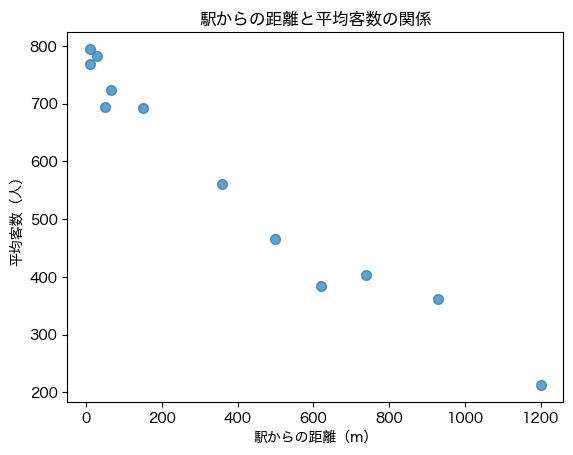

In [6]:
# 解答例
import matplotlib.pyplot as plt

plt.scatter(df['駅からの距離'], df['平均客数'], s=50, alpha=0.7)
plt.title('駅からの距離と平均客数の関係')
plt.xlabel('駅からの距離（m）')
plt.ylabel('平均客数（人）');

## 演習３

`df` について，「駅からの距離」と「平均客数」の間の相関係数を計算し，表示せよ．
また，**説明** と書かれたMarkdownセルに，演習2の散布図と本演習で算出した相関係数の結果から，何が読み取れるか考えて自分なりに考察を書くこと．

In [7]:
# 解答例
df[['駅からの距離', '平均客数']].corr()

,駅からの距離,平均客数
駅からの距離,1.000000,-0.979522
平均客数,-0.979522,1.000000


**説明**

…

## 演習4：発展課題

これ以降は発展的な演習課題となります． 
解くことは必須ではありませんが，ぜひチャレンジしてみてください．

演習4では，気象庁のオープンデータから取得した東広島市の1979年〜2021年までの月別平均気温のデータを用いる．
本データは，`higashi-hiroshima-temps.csv` という CSVファイルに保存されている．

まずは以下のセルを実行し，当該ファイルをダウンロードして `data` フォルダに格納せよ．

In [ ]:
!mkdir -p data
!wget -P data https://raw.githubusercontent.com/ground-zero-programming/zero-pro-data/refs/heads/main/data/data_analysis/exercise/higashi-hiroshima-temps.csv -O data/higashi-hiroshima-temps.csv

次に，以下のセルを実行して `higashi-hiroshima-temps.csv` の内容を `df_temps` というDataFrameに格納せよ．

In [8]:
# 解答例
import pandas as pd

df_temps = pd.read_csv('data/higashi-hiroshima-temps.csv') 

df_temps

,年,月,平均気温
0,1979,1,2.9
1,1979,2,4.1
2,1979,3,5.9
3,1979,4,11.0
4,1979,5,14.8
...,...,...,...
521,2022,6,22.0
522,2022,7,25.8
523,2022,8,26.6
524,2022,9,23.1


上記の出力結果から分かるように，本データは `年`，`月`，`平均気温` の3つの列から構成されており，1979年1月〜2022年10月までの平均気温が行方向に続いている．

以降，この `df_temps` を用いて演習課題に解答すること．
グラフを描画する際は，タイトルや軸ラベルなど，必要な情報を含めること．

### 演習4-1

`df_temps` から各年の11月の平均気温だけを抽出し，線グラフを描画せよ．
なお，グラフの横軸は年，縦軸は平均気温とする．

**出力例**

![](./figs/kadai4-1_sample.png)

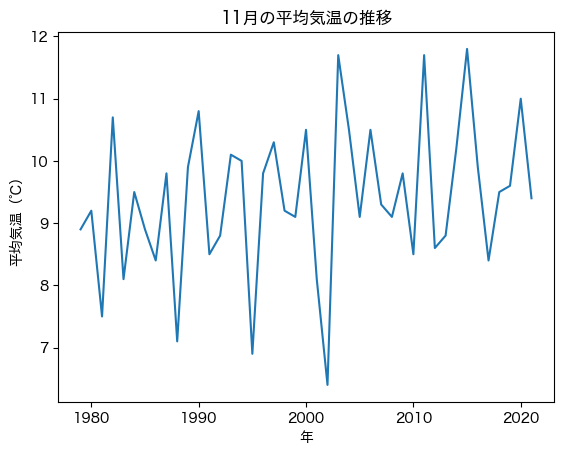

In [9]:
# 解答例
import matplotlib.pyplot as plt

plt.plot(df_temps[df_temps['月'] == 11]['年'], df_temps[df_temps['月'] == 11]['平均気温'])
plt.title(f'{11}月の平均気温の推移')
plt.xlabel('年')
plt.ylabel('平均気温（℃）');

### 演習4-2

以下の仕様の関数を作成せよ．

関数名：       `plot_temps` <br>
引数：         `df`, `year`, `month` <br>
処理の内容：    引数で渡されたDataFrame `df` に対し，`year` 年以降の `month` 月の平均気温を線グラフで出力する．

※グラフの横軸は年，縦軸は平均気温とする．<br>
※プログラムには，関数の呼び出し命令文を含めること（引数 `df` には `df_temps` を渡し，`year` と `month` は任意に設定して良い）．

**実行例と出力例**

```python
# 2000年以降の11月の平均気温を出力したい場合
plot_temps(df_temps, 2000, 11)
```

![](./figs/kadai4-2_sample.png)

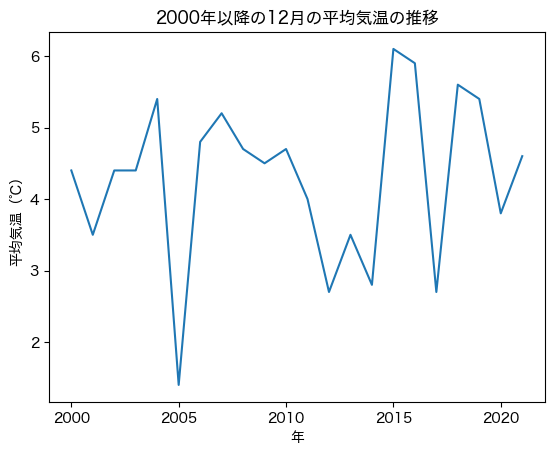

In [11]:
# 解答例

def plot_temps(df, year, month):
    condition = (df['年'] >= year) & (df['月'] == month)
    X = df[condition]['年']
    Y = df[condition]['平均気温']

    plt.plot(X, Y)
    plt.title(f'{year}年以降の{month}月の平均気温の推移')
    plt.xlabel('年')
    plt.ylabel('平均気温（℃）');

plot_temps(df_temps, 2000, 12)

### 演習4-3

以下の仕様の関数を作成せよ．

関数名：       `plot_temps_multi` <br>
引数：         `df`, `months` <br>
処理の内容：    DataFrame `df` に対し，リスト `months` に格納された複数の月の平均気温をそえぞれ線グラフで重ねて出力する．

※グラフの横軸は年，縦軸は平均気温とする．各線グラフは色分けし，グラフ中に凡例を示すこと．<br>
※プログラムには，関数の呼び出し命令文を含めること（引数 `df` には `df_temps` を渡し，`year` と `month` は任意に設定して良い）．

**実行例と出力例**

```python
# 1月, 4月, 9月, 12月の線グラフを重ねて表示する．
plot_temps(df_temps, [1, 4, 9, 12])
```

![](./figs/kadai4-3_sample.png)

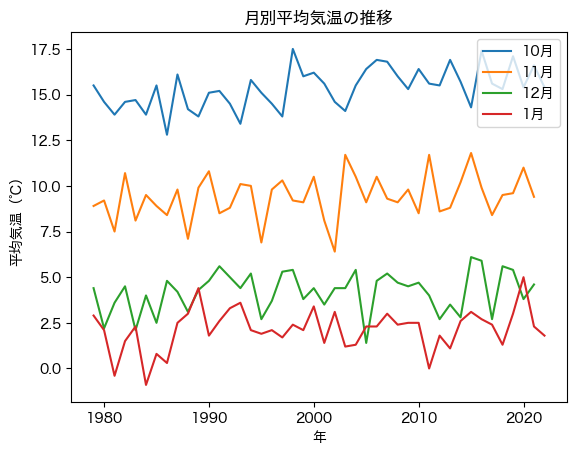

In [13]:
# 解答例
def plot_temps_multi(df, months):
    for m in months:
        plt.plot(df[df['月'] == m]['年'], df[df['月'] == m]['平均気温'], label=f'{m}月')
        
    plt.legend()
    plt.title('月別平均気温の推移')
    plt.xlabel('年')
    plt.ylabel('平均気温（℃）');

plot_temps_multi(df_temps, [10, 11, 12, 1])


### 演習4-4

`df_temps` の1月〜12月の各月について，全ての年に対する「平均気温」の平均と標準偏差を計算せよ．

また，横軸を「月」，縦軸を「平均気温」の平均とする棒グラフを描画せよ．
このとき，棒グラフには「平均気温」の標準偏差をエラーバー（誤差範囲）として付与すること．

**エラーバー（誤差範囲）の付け方**

棒グラフにエラーバーを付ける際には，引数 `yerr` に誤差範囲を定義する値のリスト（例：標準偏差や標準誤差など）を渡せば良い．

例えば，変数 `Y_std` に誤差範囲を定義する値のリストが入っている場合は，以下のように書く．

```python
plt.bar(X, Y, yerr=Y_std)
```

**出力例**

![](./figs/kadai4-4_sample.png)

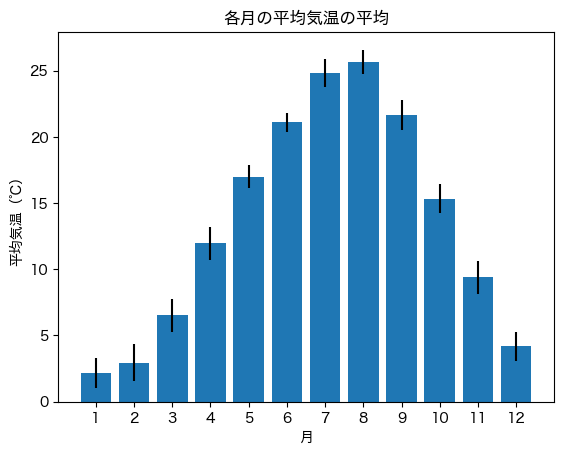

In [14]:
# 解答例
months = list(range(1, 13))
year_mean = []
year_sd = []

for m in months:
    year_mean.append(df_temps[df_temps['月'] == m]['平均気温'].mean())
    year_sd.append(df_temps[df_temps['月'] == m]['平均気温'].std())

plt.bar(months, year_mean, yerr=year_sd)
plt.xticks(list(range(1, 13)))
plt.title('各月の平均気温の平均')
plt.xlabel('月')
plt.ylabel('平均気温（℃）');